In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
columns = ['count', 'haxsha']
df = pd.read_csv('../resource/cnt_sorce_file.txt', names=columns)

df.head(5)

,count,haxsha
0,0,6c0a8a66995c66a755050c0741d1503ed0ad59ee
1,0,239254ec6c25e75969655e303783f54777f54399
2,1,ab649213da0e0e6e74d29d632c973151570e4888
3,1,1981133bcb31bd22709377325c4fa69c4db0d6d7
4,5,ac67f5e7b06bdf653ed15b21ac98e534b7eb11e0


In [3]:
unique_values = df['count'].unique()
unique_values
unique_values.shape

(108,)

In [4]:
counts = df['count'].value_counts(normalize=False)
counts

count
0      4290
1      2578
2       949
3       549
4       369
       ... 
82        1
207       1
103       1
428       1
188       1
Name: count, Length: 108, dtype: int64

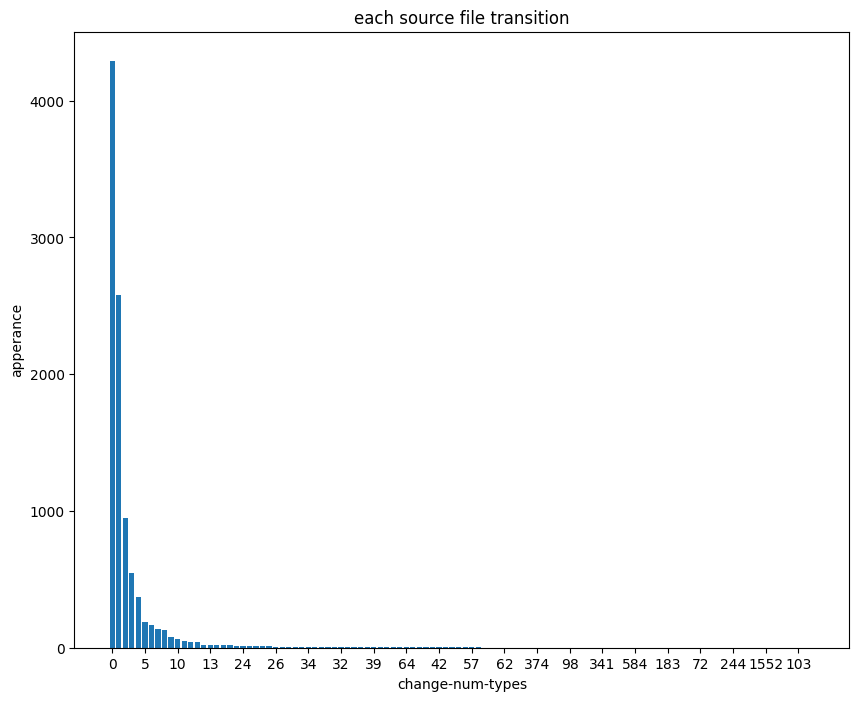

In [17]:
plt.bar(range(len(counts.index)), counts.values)
plt.rcParams['figure.figsize'] = [10, 8]
x_ticks = range(0, len(counts), 5)
plt.xticks(x_ticks,counts.index[x_ticks])
plt.title('each source file transition')
plt.xlabel('change-num-types')
plt.ylabel('apperance')
plt.show()

In [32]:
counts = df['count'].value_counts(normalize=True)
# まとめる回数のしきい値を設定
threshold = 0.005

# しきい値未満の要素をまとめる
other_count = counts[counts < threshold].sum()
counts = counts[counts >= threshold]
counts['others'] = other_count
counts

count
0         0.428957
1         0.257774
2         0.094891
3         0.054895
4         0.036896
5         0.019098
6         0.016698
7         0.013599
8         0.012599
9         0.007699
10        0.006699
others    0.050195
Name: proportion, dtype: float64

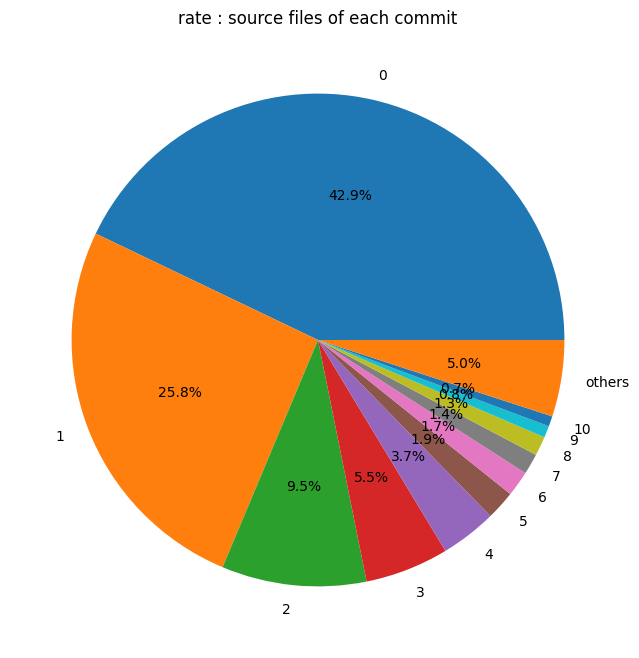

In [33]:
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('rate : source files of each commit')
plt.show()